In [1]:
import pandas as pd
from collections import Counter
import numpy as np
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import matplotlib.colors as clr

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
!python ../../evaluation/main.py -d geo_dists.csv -s mmdp -k 10

Result written to /Users/jk31ds/Desktop/typdiv-sampling/use_cases/geo-dist/../../evaluation/samplesmmdp-langs_gb-10-geo_dists-123.txt

sample=['gobu1238', 'gras1239', 'kunz1244', 'mort1237', 'puka1242', 'tata1258', 'west2618', 'wira1265', 'yaku1245', 'yuec1235']


In [4]:
# load gb and sample
gb_df = pd.read_csv("../../grambank/cldf/languages.csv")
sample=['gobu1238', 'gras1239', 'kunz1244', 'mort1237', 'puka1242', 'tata1258', 'west2618', 'wira1265', 'yaku1245', 'yuec1235']

In [5]:
# get relevant coordinates
lang_df = gb_df[gb_df["ID"].isin(sample)]
coord_df = lang_df[["Latitude", "Longitude"]]

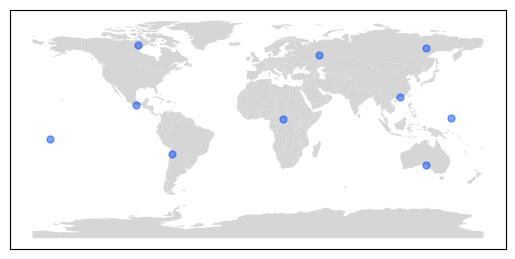

In [6]:
# Plot world
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(color='#D6D6D6')

# Plot datapoints
geometry = [Point(xy) for xy in zip(coord_df['Longitude'], coord_df['Latitude'])]
gdf = GeoDataFrame(coord_df, geometry=geometry)
coords = gdf.plot(ax=base, marker='o', color="#0349FC", markersize=25, alpha=0.5)

# Style
base.set_facecolor('white')
plt.xticks([], [])
plt.yticks([], [])

# Save to file
plt.savefig('10-distant-langs-light.pdf')